<a href="https://colab.research.google.com/github/uddipan-pal/Computational-phys-assignment-3/blob/main/Computational_Physics_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fourier Transfom assignment 3

In [ ]:
import numpy as np
import pylab as pl
import scipy as sc

Question 1

Text(0.5, 0, 'K')

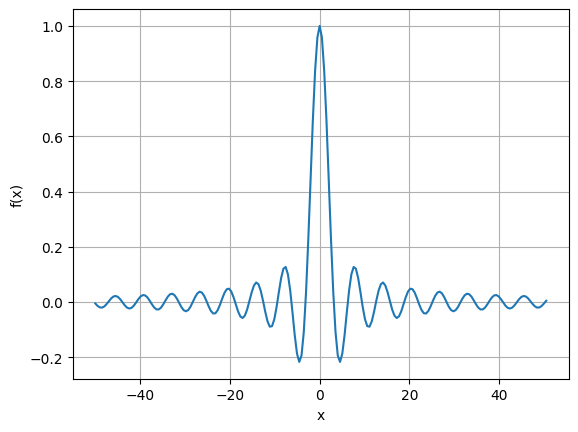

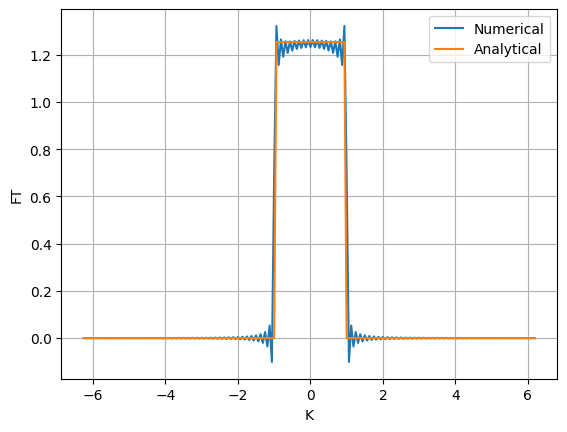

In [ ]:
def f(x):
  if np.round(x,decimals=5)!=0:
    return np.sin(x)/x
  else:
    return 1
xmi=-50
xma=-xmi
n=200
h=(xma-xmi)/(n-1)*1.0

x=np.linspace(xmi,xma+h,n)
F=[f(i) for i in x]
pl.figure(1)
pl.plot(x,F)
pl.grid()
pl.ylabel("f(x)")
pl.xlabel("x")

K = 2*np.pi*np.fft.fftfreq(n,d=h)
coeff=np.exp(-1j*K*xmi)
K1 = np.fft.fftshift(K)

dft=np.fft.fft(F,norm='ortho')
FT = h*np.sqrt(n/(2*np.pi))*coeff*dft
FT= np.fft.fftshift(FT)

pl.figure(2)
pl.plot(K1,(FT.real))

def g(k):
  return 1/2.* np.sqrt(np.pi/2)*(np.sign(1-k)+np.sign(1+k))
pl.plot(K1,g(K1))
pl.grid()
pl.legend({"Numerical","Analytical"})
pl.ylabel("FT")
pl.xlabel("K")

Question 2 -plot for C code

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv('q2_data.csv',sep=",",header=None)
print(dataframe)

Saving q2_data.csv to q2_data.csv
           0         1
0    6.17182  0.000000
1   -6.33125 -0.099459
2    6.16752  0.193822
3   -6.32756 -0.298400
4    6.15440  0.387202
..       ...       ...
195 -6.32070  0.497450
196  6.15440 -0.387202
197 -6.32756  0.298400
198  6.16752 -0.193822
199 -6.33125  0.099459

[200 rows x 2 columns]


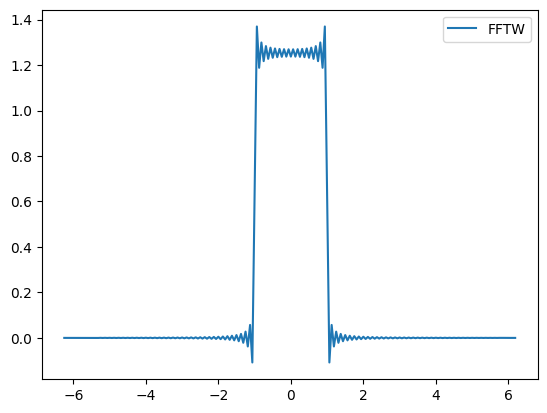

In [ ]:
data = dataframe.to_numpy()
ft_C = data[:,0]+1j*data[:,1]

K = 2*np.pi*np.fft.fftfreq(n,d=h)
K1 = np.fft.fftshift(K)
coeff=h*np.sqrt(n/(2*np.pi))*np.exp(-1j*K1*xmi)

ft_C = coeff*np.fft.fftshift(ft_C)/np.sqrt(n)
pl.plot(K1,np.real(ft_C),label='FFTW')
pl.legend()


Question 3- from from c(gsl)

In [ ]:
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv('q3_data.csv',sep=",",header=None)
print(dataframe)

Saving q3_data.csv to q3_data.csv
           0         1
0    6.17182  0.000000
1   -6.33125 -0.099459
2    6.16752  0.193822
3   -6.32756 -0.298400
4    6.15440  0.387202
..       ...       ...
195 -6.32070  0.497450
196  6.15440 -0.387202
197 -6.32756  0.298400
198  6.16752 -0.193822
199 -6.33125  0.099459

[200 rows x 2 columns]


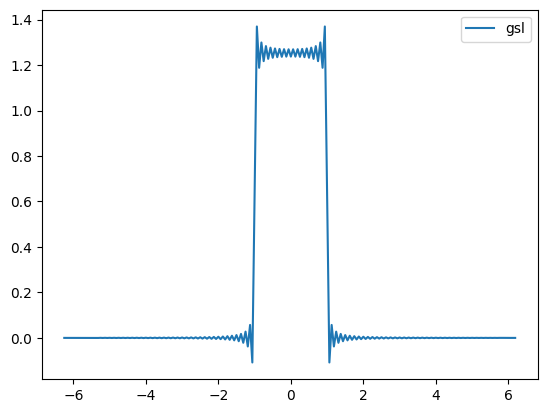

In [ ]:
data1 = dataframe.to_numpy()
ft_C1 = data1[:,0]+1j*data1[:,1]

coeff=h*np.sqrt(n/(2*np.pi))*np.exp(-1j*K1*xmi)

ft_C1 = coeff*np.fft.fftshift(ft_C1)/np.sqrt(n)
pl.plot(K1,np.real(ft_C1),label='gsl')
pl.legend()

Combined plot

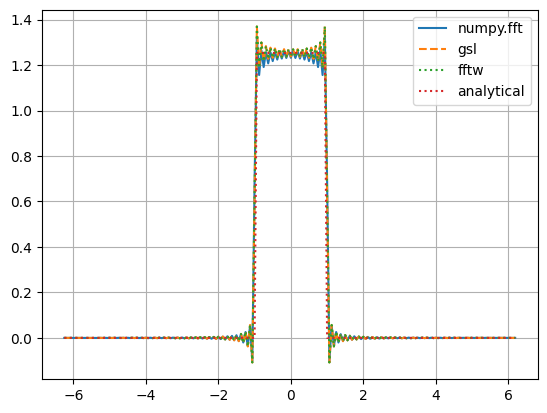

In [ ]:
pl.figure(5)
pl.plot(K1,(FT.real),label='numpy.fft')
pl.plot(K1,np.real(ft_C1),'--',label='gsl')
pl.plot(K1,np.real(ft_C),':',label='fftw')
pl.plot(K1,g(K1),':',label='analytical')
pl.legend()
pl.grid()

Question 4 : plot from C (for exp(-x^2) FT)

In [ ]:
from google.colab import files
uploaded = files.upload()
dataframe = pd.read_csv('q4_data.csv',sep=",",header=None)
print(dataframe)

Saving q4_data.csv to q4_data.csv
           0         1
0    3.52718  0.000000
1   -3.52330 -0.055349
2    3.51169  0.110359
3   -3.49242 -0.164698
4    3.46562  0.218038
..       ...       ...
195 -3.43145  0.270061
196  3.46562 -0.218038
197 -3.49242  0.164698
198  3.51169 -0.110359
199 -3.52330  0.055349

[200 rows x 2 columns]


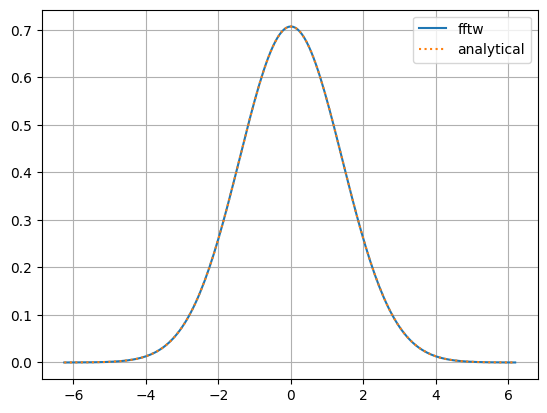

In [ ]:

data2 = dataframe.to_numpy()
ft_C2 = data2[:,0]+1j*data2[:,1]
K = 2*np.pi*np.fft.fftfreq(n,d=h)
K1 = np.fft.fftshift(K)
coeff=h*np.sqrt(n/(2*np.pi))*np.exp(-1j*K1*xmi)

ft_C2 = coeff*np.fft.fftshift(ft_C2)/np.sqrt(n)
pl.plot(K1,np.real(ft_C2),label='fftw')
pl.plot(K1,1/np.sqrt(2)*np.exp(-K1**2/4),':',label="analytical")
pl.legend()
pl.grid()

Question 5

Text(0, 0.5, 'Time taken')

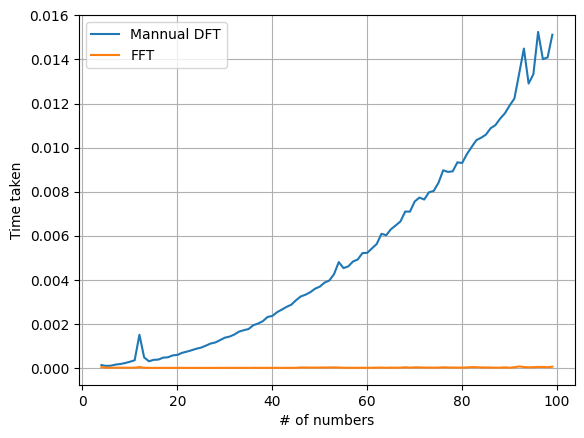

In [ ]:
import time
import random


n=10
N=[]
for i in range(n):
 #N.append(random.randint(0,3000))
 N.append(i)

def manual(N):
  n=len(N)
  fN=[]
  for q in range(n):
    s=0.0
    for p in range(n):
      s=s+N[p]*np.exp(-1j*2*np.pi/n*p*q)
    fN.append(1/np.sqrt(n)*s)
  return fN

def numfft(N):
  return np.fft.fft(N,norm='ortho')

def timetaken():
  n=[]
  s1=[]
  s2=[]
  for i in range(4,100):
    N=[]
    n.append(i)
    for j in range(i):
      N.append(random.randint(0,3000))
    st1=time.time()
    manual(N)
    sp1=time.time()
    s1.append(sp1-st1)

    st2=time.time()
    numfft(N)
    sp2=time.time()
    s2.append(sp2-st2)
  #print(s1)
  pl.plot(n,s1)
  pl.plot(n,s2)
  pl.legend(["Mannual DFT","FFT"])

timetaken()
pl.grid()
pl.xlabel("# of numbers")
pl.ylabel("Time taken")

Question 6

Text(0.5, 0, 'K')

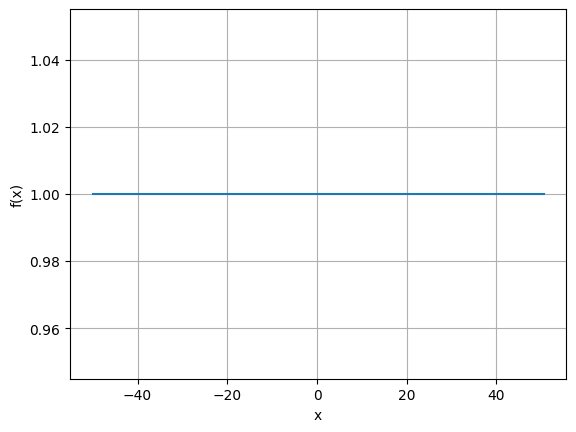

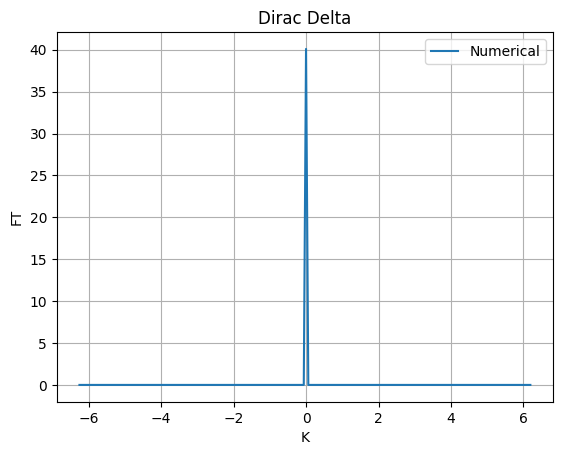

In [ ]:
def f(x):
  return 1
  #return np.exp(-x**2)

xmi=-50
xma=-xmi
n=200
h=(xma-xmi)/(n-1)*1.0

x=np.linspace(xmi,xma+h,n)
F=[f(i) for i in x]
pl.figure(1)
pl.plot(x,F)
pl.grid()
pl.ylabel("f(x)")
pl.xlabel("x")

K = 2*np.pi*np.fft.fftfreq(n,d=h)
coeff=np.exp(-1j*K*xmi)
K = np.fft.fftshift(K)

dft=np.fft.fft(F,norm='ortho')
FT = h*np.sqrt(n/(2*np.pi))*coeff*dft
FT= np.fft.fftshift(FT)

pl.figure(2)
pl.title("Dirac Delta")
pl.plot(K,(FT.real))


pl.grid()
pl.legend({"Numerical","Analytical"})
pl.ylabel("FT")
pl.xlabel("K")

Question 10-2D Gaussian

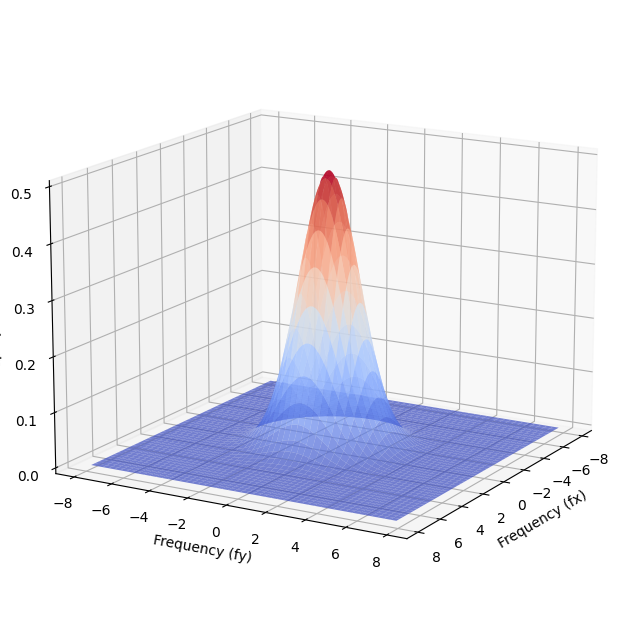

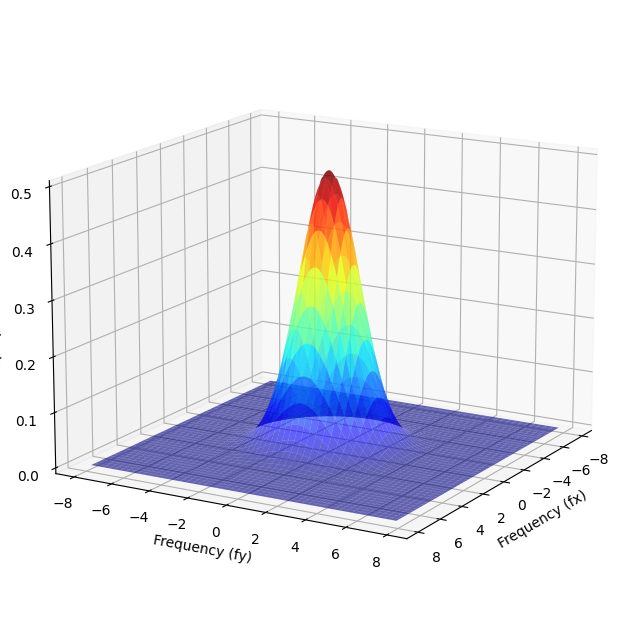

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

def f(x, y, ):
    return np.exp(-((x)**2 + (y)**2) )  #gaussian 2D
n=1000
xm=200
ym=200 #range
h=2*xm/(n-1)
x = np.linspace(-xm,xm, n)
y = np.linspace(-ym,ym, n)
x, y = np.meshgrid(x, y)

#2D Fourier Transform
dft2=np.fft.fft2(f(x,y),norm="ortho")


fx=2*np.pi*np.fft.fftfreq(n,d=h)
fy=2*np.pi*np.fft.fftfreq(n,d=h)

coeff=np.exp(-1j*fx*(-xm)-1j*fy*(-ym))
ft=h**2*n/(2*np.pi)*np.multiply(coeff,dft2)

fx=np.fft.fftshift(fx)
fy=np.fft.fftshift(fy)

fx, fy = np.meshgrid(fx, fy)

ft= np.fft.fftshift(ft)
def yt(k1,k2):
  return 0.5*np.exp(0.25*(-k1**2-k2**2))
# Plot

fig = pl.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(fx, fy,abs(ft), cmap='coolwarm',alpha=0.7)
ax.view_init(15, 30)
ax.set_xlabel('Frequency (fx)')
ax.set_ylabel('Frequency (fy)')
ax.set_zlabel('Magnitude')
pl.show()

fig2 = pl.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(fx, fy, yt(fx,fy), cmap='jet',alpha=0.6)
ax.view_init(15, 30)
ax.set_xlabel('Frequency (fx)')
ax.set_ylabel('Frequency (fy)')
ax.set_zlabel('Magnitude')
pl.show()

Question 11-Convolution

Text(0.5, 0, 'x')

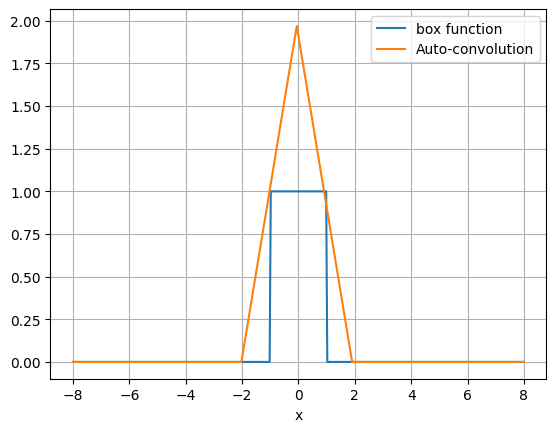

In [ ]:
def f(x):
  if (-1<x<1):
    return 1
  else:
    return 0
def g(x):
  return f(x)

xmi=-4
xma=-xmi
n=200
h=(xma-xmi)/(n-1)*1.0

F=[]
G=[]
x=np.linspace(xmi,xma+h,n)
for i in range(2*n):
  if(i<n):
    F.append(f(x[i]))
    G.append(g(x[i]))
  else:
    F.append(0)
    G.append(0)



dft1=np.fft.fft(F,norm='ortho')
dft2=np.fft.fft(G,norm='ortho')
conv=h*np.sqrt(2*n)*np.fft.ifft(np.multiply(dft1,dft2),norm='ortho')
#print(conv)
x=np.linspace(2*xmi,xma+xma,2*n)

F=[f(i) for i in (x)]
pl.plot(x,F)
pl.plot(x,conv)
pl.grid()
pl.legend({"Auto-convolution","box function"})
pl.ylabel("")
pl.xlabel("x")

Question 12

Text(0.5, 0, 'x')

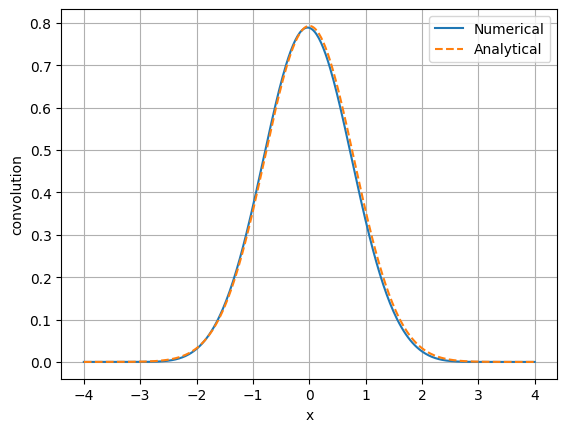

In [ ]:

def f(x):
  return np.exp(-x**2)
def g(x):
  return np.exp(-4*x**2)
xmi=-2
xma=-xmi
n=200
h=(xma-xmi)/(n-1)*1.0

F=[]
G=[]
x=np.linspace(xmi,xma+h,n)
for i in range(2*n):
  if(i<n):
    F.append(f(x[i]))
    G.append(g(x[i]))
  else:
    F.append(0)
    G.append(0)



dft1=np.fft.fft(F,norm='ortho')
dft2=np.fft.fft(G,norm='ortho')
conv=h*np.sqrt(2*n)*np.fft.ifft(np.multiply(dft1,dft2),norm='ortho')
#print(conv)
x=np.linspace(2*xmi,xma+xma,2*n)
pl.plot(x,conv)

def y(x):
  return np.exp(-4*x**2/5)*np.sqrt(np.pi/5)
pl.plot(x,y(x),'--')

pl.grid()
pl.legend({"Numerical","Analytical"})
pl.ylabel("convolution")
pl.xlabel("x")

Question 13

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving noise.txt to noise (2).txt


Text(0, 0.5, 'data')

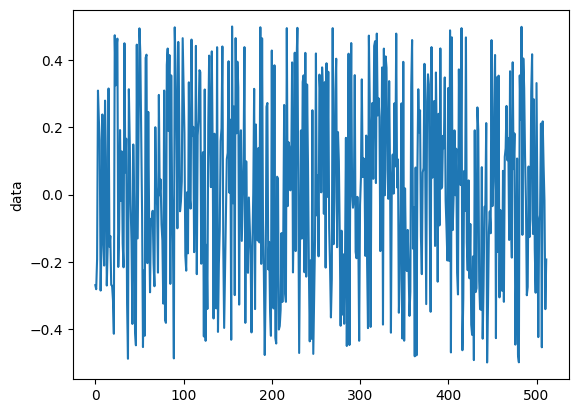

In [ ]:
a=np.loadtxt("noise.txt")
pl.plot(a)
pl.ylabel('data')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'DFT')

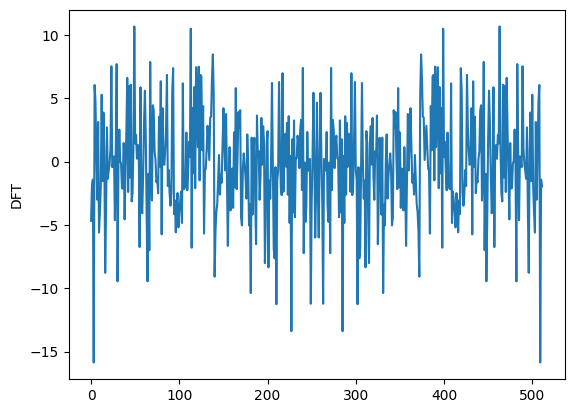

In [ ]:
a1=np.fft.fftshift(np.fft.fft(a))
pl.plot(a1)
pl.ylabel('DFT')

Text(0, 0.5, 'power spectrum')

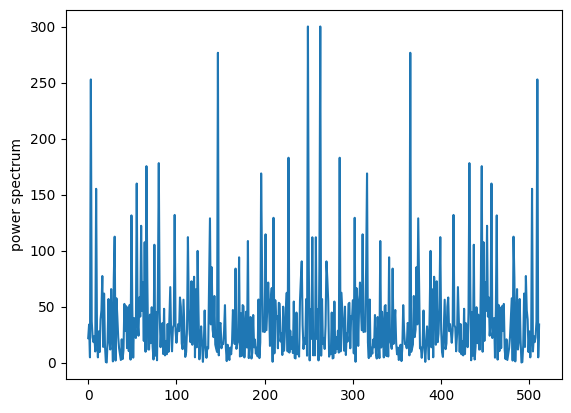

In [ ]:
p=abs(a1)**2
pl.plot(p)
pl.ylabel('power spectrum')

Text(0, 0.5, 'noise in bins of 10')

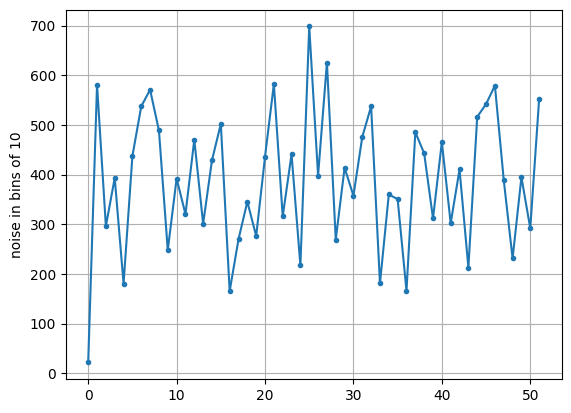

In [ ]:
bi=[]
s=0
for i in range(len(a)):
  s=s+p[i]
  if(i % 10==0):
    bi.append(s)
    #print(s)
    s=0
pl.figure(1)
pl.plot(bi,'.-')
pl.grid()
pl.ylabel("noise in bins of 10")